In [ ]:
#imoprting dependencies:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import numpy as np
import time

In [ ]:
torch.manual_seed(42)

In [ ]:
#check for cuda:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device}')

Using cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#transforms:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(35),
    transforms.ColorJitter(brightness=0.28, contrast=0.23, saturation=0.30),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std= [0.229, 0.224, 0.225])
])

test_val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std= [0.229, 0.224, 0.225])
])


In [ ]:
# #unzipping the dataset:
import zipfile
zip_path = "/content/drive/MyDrive/Dataset/GrapeVine.zip"
extract_to = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_to)


In [ ]:
#load the dataset:
dataset_path = "/content/grape_dataset"
dataset = ImageFolder(root=dataset_path, transform=None)
len(dataset)

9027

In [ ]:
train_dataset_path = "/content/grape_dataset/train"
test_dataset_path = "/content/grape_dataset/test"

train_dataset = ImageFolder(root=train_dataset_path, transform=train_transform)
test_dataset = ImageFolder(root=test_dataset_path, transform=test_val_transform)

print(len(train_dataset))
print(len(test_dataset))


7222
1805


In [ ]:
print(train_dataset.class_to_idx)

{'Grape___Black_rot': 0, 'Grape___Esca_(Black_Measles)': 1, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 2, 'Grape___healthy': 3}


In [ ]:
labels = train_dataset.targets
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(list(range(len(train_dataset))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
# #spilt train(90)val(10) data:(alreay have test data)
from sklearn.model_selection import train_test_split
train_idx , val_idx = train_test_split(list(range(len(train_dataset))), test_size = 0.15, stratify= labels, random_state=42)

In [ ]:
class CustomDataset(Dataset):

  def __init__(self, train_dataset, indices, transform=None):

    self.train_dataset = train_dataset
    self.indices = indices
    self.transform = transform


  def __getitem__(self, idx):

    img, label = self.train_dataset[self.indices[idx]]
    return img, label


  def __len__(self):
    return len(self.indices)


In [ ]:
# Prepare indices for the test dataset (use all)
test_idx = list(range(len(test_dataset)))

# Correct instantiation
train_data = CustomDataset(train_dataset, train_idx)
val_data = CustomDataset(train_dataset, val_idx)
test_data = CustomDataset(test_dataset, test_idx)


In [ ]:
print(f' 1. Train data: {len(train_data)}')
print(f' 2. Test data: {len(test_dataset)}')
print(f' 3. Val data: {len(val_data)}')


 1. Train data: 6138
 2. Test data: 1805
 3. Val data: 1084


In [ ]:
#dataloader:
train_load = DataLoader(train_data, batch_size=64, shuffle=True)
val_load = DataLoader(val_data, batch_size=64, shuffle=False)
test_load = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
print(f' 1. Train dataloader: {len(train_load)}')
print(f' 2. Test dataloader: {len(test_load)}')
print(f' 3. Val dataloader: {len(val_load)}')


 1. Train dataloader: 96
 2. Test dataloader: 29
 3. Val dataloader: 17


In [ ]:
#importing the model:
import timm

# Load EfficientNet-B4 model
model = timm.create_model('efficientnet_b4', pretrained=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/77.9M [00:00<?, ?B/s]

In [ ]:
# model

In [ ]:
# print(model.blocks[6])  # Block 7 (zero-indexed)


In [ ]:
# Separate the feature extractor (exclude the Conv1x1 layer)
# EfficientNet's conv_head is usually the Conv1x1 layer
backbone = model.blocks  # MBConv blocks up to before Conv1x1

# Save the original Conv1x1 layer (conv_head)
conv1x1 = model.conv_head
# Keep the original global pooling layer
avgpool = model.global_pool

In [ ]:
# Freezing the CNN part
for param in backbone.parameters():
    param.requires_grad = False

In [ ]:
# backbone

In [ ]:
class CustomDeconvCNN(nn.Module):
    def __init__(self):
        super(CustomDeconvCNN, self).__init__()
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(448, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.cnn = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(256, 448, kernel_size=3, padding=1),
            nn.BatchNorm2d(448),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.deconv(x)
        x = self.cnn(x)
        return x

In [ ]:
class CustomClassifier(nn.Module):
    def __init__(self, in_features, num_class):
        super(CustomClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_class)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
class CustomEfficientNetB4(nn.Module):
    def __init__(self, backbone, conv1x1, avgpool, num_classes):
        super(CustomEfficientNetB4, self).__init__()
        self.backbone = backbone
        self.custom_block = CustomDeconvCNN()
        self.conv1x1 = conv1x1
        self.avgpool = avgpool
        self.classifier = CustomClassifier(1792, num_classes)

    def forward(self, x):
        for block in self.backbone:
            x = block(x)

        x = self.custom_block(x)
        x = self.conv1x1(x)
        x = self.avgpool(x)

        if x.ndim == 4:
            x = x.flatten(1)

        x = self.classifier(x)
        return x

In [ ]:
# Instantiate the custom model with the desired number of classes
num_classes = 4
custom_model = CustomEfficientNetB4(backbone, conv1x1, avgpool, num_classes)

In [ ]:
#moving the model to gpu:
model = model.to(device)

In [ ]:
#setting parameters:
learning_rate = 0.001
epochs = 30

In [ ]:
#loss and optimizer:
loss_fun = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr= learning_rate, weight_decay=1e-4)  #only taking parameters with required grad true

In [ ]:
#adding a scheduler for learning rate:
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.1)

In [ ]:
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

#-----------------training loop-----------------:
model.train()
for i in range(epochs):
  start_time = time.time()

  total_epoch_loss=0
  correct = 0
  total = 0

  for images, labels in train_load:

    #move data to gpu:
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()  #clr the grads

    #forward pass:
    output= model(images)

    #loss calculate:
    loss = loss_fun(output, labels)

    #backward pass:
    loss.backward()

    #updates grad:
    optimizer.step()
    #scheduler.step()

    total_epoch_loss += loss.item() * images.size(0)

    #to calculate the accuracy and training_loss:
    _, predicted = torch.max(output, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


  #calculation loss and accuracy:
  epoch_loss = total_epoch_loss / total
  train_losses.append(epoch_loss)
  train_acc = correct / total
  train_accuracies.append(train_acc)




  #----------------validation-------------------:

  model.eval()
  total = 0
  correct = 0
  total_epoch_loss = 0

  with torch.no_grad():
    for images, labels in val_load:
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      #loss:
      loss = loss_fun(output, labels)
      total_epoch_loss += loss.item() * images.size(0)

      #accuracy:
      _, predicted = torch.max(output,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()


  epoch_loss = total_epoch_loss / total
  val_losses.append(epoch_loss)
  val_acc = correct / total
  val_accuracies.append(val_acc)
  end_time = time.time()


  print(f"Epoch {i+1}/{epochs} --- Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f} || Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f} || Time: {end_time - start_time:.2f}s" )




Epoch 1/30 --- Train Acc: 0.9655, Val Acc: 0.9659 || Train Loss: 0.1071, Val Loss: 0.1002 || Time: 95.03s
Epoch 2/30 --- Train Acc: 0.9775, Val Acc: 0.9705 || Train Loss: 0.0660, Val Loss: 0.0858 || Time: 87.69s
Epoch 3/30 --- Train Acc: 0.9803, Val Acc: 0.9779 || Train Loss: 0.0559, Val Loss: 0.0680 || Time: 87.71s
Epoch 4/30 --- Train Acc: 0.9822, Val Acc: 0.9742 || Train Loss: 0.0525, Val Loss: 0.0675 || Time: 86.78s
Epoch 5/30 --- Train Acc: 0.9860, Val Acc: 0.9880 || Train Loss: 0.0495, Val Loss: 0.0448 || Time: 87.60s
Epoch 6/30 --- Train Acc: 0.9888, Val Acc: 0.9834 || Train Loss: 0.0407, Val Loss: 0.0549 || Time: 87.52s
Epoch 7/30 --- Train Acc: 0.9862, Val Acc: 0.9889 || Train Loss: 0.0415, Val Loss: 0.0421 || Time: 91.56s
Epoch 8/30 --- Train Acc: 0.9889, Val Acc: 0.9825 || Train Loss: 0.0379, Val Loss: 0.0550 || Time: 88.09s
Epoch 9/30 --- Train Acc: 0.9922, Val Acc: 0.9815 || Train Loss: 0.0331, Val Loss: 0.0483 || Time: 87.49s
Epoch 10/30 --- Train Acc: 0.9909, Val Acc: 0.

In [ ]:
for name, param in custom_model.named_parameters():
    if param.requires_grad:
        print(name)


custom_block.deconv.0.weight
custom_block.deconv.0.bias
custom_block.deconv.1.weight
custom_block.deconv.1.bias
custom_block.deconv.3.weight
custom_block.deconv.3.bias
custom_block.deconv.4.weight
custom_block.deconv.4.bias
custom_block.cnn.0.weight
custom_block.cnn.0.bias
custom_block.cnn.1.weight
custom_block.cnn.1.bias
custom_block.cnn.3.weight
custom_block.cnn.3.bias
custom_block.cnn.4.weight
custom_block.cnn.4.bias
conv1x1.weight
classifier.fc.0.weight
classifier.fc.0.bias
classifier.fc.3.weight
classifier.fc.3.bias


In [ ]:
print(f"Training Accuracy: {train_accuracies}")
print(f"Validation Accuracy: {val_accuracies}")
print(f"Training Loss: {train_losses}")
print(f"Validation Loss: {val_losses}")

Training Accuracy: [0.9654610622352557, 0.9775171065493646, 0.9802867383512545, 0.9822417725643532, 0.9859889214727925, 0.9887585532746823, 0.9861518409905506, 0.9889214727924406, 0.9921798631476051, 0.9908765070055393, 0.9910394265232975, 0.9908765070055393, 0.9920169436298468, 0.9916911045943304, 0.9903877484522646, 0.9921798631476051, 0.9908765070055393, 0.992831541218638, 0.9908765070055393, 0.9929944607363962, 0.9915281850765721, 0.9933202997719127, 0.992831541218638, 0.9941348973607038, 0.9929944607363962, 0.9942978168784621, 0.98989898989899, 0.990713587487781, 0.9949494949494949, 0.9920169436298468]
Validation Accuracy: [0.9658671586715867, 0.9704797047970479, 0.977859778597786, 0.974169741697417, 0.9880073800738007, 0.9833948339483395, 0.988929889298893, 0.9824723247232472, 0.981549815498155, 0.9935424354243543, 0.9935424354243543, 0.9870848708487084, 0.9861623616236163, 0.9861623616236163, 0.985239852398524, 0.985239852398524, 0.9870848708487084, 0.9870848708487084, 0.9861623

In [ ]:
model.eval()

EfficientNet(
  (conv_stem): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn1): BatchNormAct2d(
          48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (b

In [ ]:
#evalutaion on train data:
total = 0
correct = 0

with torch.no_grad():

  for images, labels in train_load:

    images, labels = images.to(device), labels.to(device)

    output = model(images)

    _, predicted = torch.max(output,1)
    total = total + labels.shape[0]
    correct = correct + (predicted == labels).sum().item()

  print(f'Total Accuracy on Train data: {(correct/total)*100:.2f}%')




Total Accuracy on Train data: 98.75%


In [ ]:
#evalutaion on test data:
total = 0
correct = 0

with torch.no_grad():

  for images, labels in test_load:

    images, labels = images.to(device), labels.to(device)

    output = model(images)

    _, predicted = torch.max(output,1)
    total = total + labels.shape[0]
    correct = correct + (predicted == labels).sum().item()

  print(f'Total Accuracy on Test data: {(correct/total)*100:.2f}%')




Total Accuracy on Test data: 98.17%


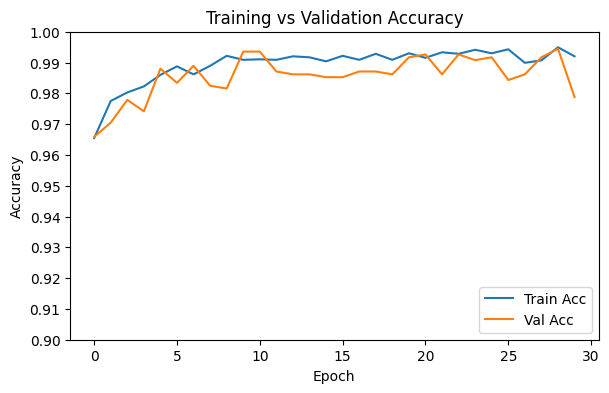

In [ ]:
#training vs validation accuracy:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(loc='lower right')
plt.xticks(ticks=range(0, epochs + 1, 5))
plt.yticks(np.arange(0.8, 1.5, 0.01))
plt.ylim(0.9, 1)
plt.show()

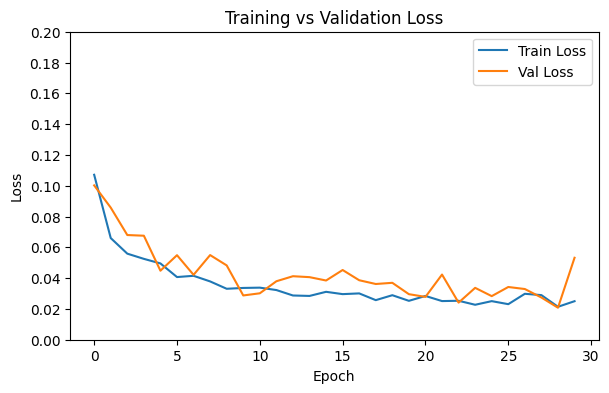

In [ ]:
#traing vs validation loss:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.xticks(ticks=range(0, epochs+1, 5))
plt.yticks(np.arange(0, 0.6, 0.02))
plt.ylim(0, 0.2)
plt.show()



In [ ]:
#confusion matrix...
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_load:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
# Accuracy
acc = accuracy_score(all_labels, all_preds)

# Precision, Recall, F1 Score (for multi-class)
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)


<Figure size 500x400 with 0 Axes>

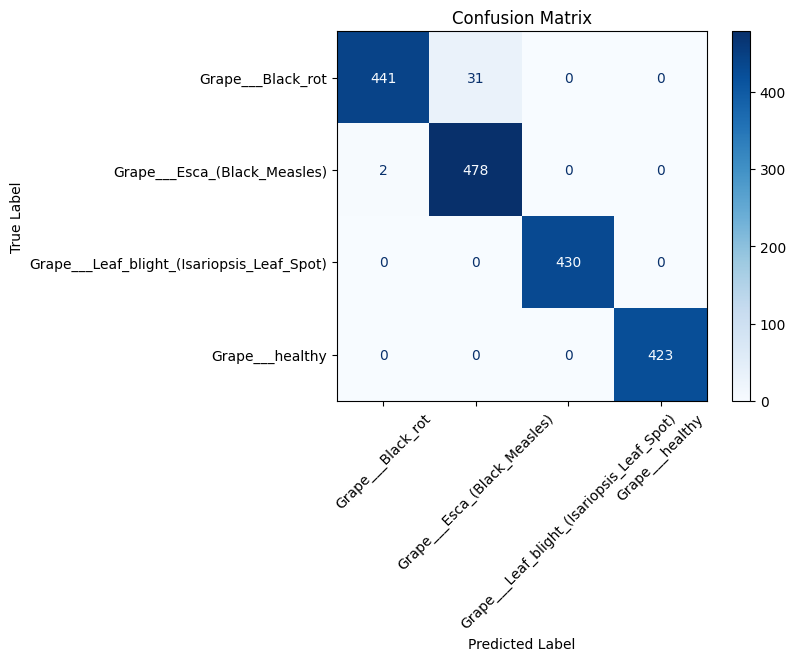

In [ ]:
# Define your class names in order of class indices
class_names = test_dataset.class_to_idx

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(5,4))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
# plt.savefig("aug-potato confusion matrix.png", dpi=100, bbox_inches="tight", pad_inches=0.1)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds, target_names=class_names))


                                            precision    recall  f1-score   support

                         Grape___Black_rot       1.00      0.93      0.96       472
              Grape___Esca_(Black_Measles)       0.94      1.00      0.97       480
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      1.00      1.00       430
                           Grape___healthy       1.00      1.00      1.00       423

                                  accuracy                           0.98      1805
                                 macro avg       0.98      0.98      0.98      1805
                              weighted avg       0.98      0.98      0.98      1805

